# Park Data Set

## What makes for the best neighborhood for a dog?
#### Parks! Dogs love being able to play outside and go on walks. The best neighborhood for a dog would have lots of parks. So my metric would classify neighborhoods with more parks as better neighborhoods

Let's look at some data about parks in Pittsburgh...

First I imported the pandas libraries so I can access pandas functions like reading csv files and manipulating the data in files. Then I also imported geopandas so I can create a map of the Pittsburgh neighborhoods later.

In [47]:
# Importing pandas libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import math

Now we look at the first 10 elements in the data set. Notice how not all elements are parks like element 8 that is a traffic island/median. To better analyze the data, we only want to look at "Parks" and not "Traffic Island/Median" and other items in the data file. Traffic Islands/Medians are not as exciting for dogs. It is all about the parks. The metric for the "bestness" of a neighborhood is the number of Parks a neighborhood has, so we can disregard the data about the Traffic Medians.

In [7]:
data = pd.read_csv("parks.csv")
data.head(10)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
8,2049886968,Amber Triangle,Traffic Island/Median,2nd Division,NaN,East Liberty,7,8,42003111500,2,8,5,3-23,40.459099,-79.931846
9,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247


To clean up the data I created a mask that filters the data by "type" and will note if the "type" is "Park" or not. Then I set a new variable called `parks` to contain only the elements in this data set that would return True that the type is park. See how now the data only has elements of type Park.

In [8]:
park_mask = data["type"]== "Park"  #filters data by type and sees if the type equals "Park"
parks = data[park_mask]
parks.head(10)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
5,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
6,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
7,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
9,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247
10,1928748922,Arlington Park,Park,Parks - Southern,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418283,-79.975050


Now that the data only contains elements that are parks suitable for dogs, I got the counts of how many parks are in eacch neighborhood.

In [9]:
parks["neighborhood"].value_counts()

Beechview                6
South Side Slopes        6
Troy Hill                5
Mount Washington         5
Hazelwood                5
                        ..
Windgap                  1
Central Lawrenceville    1
Oakwood                  1
Hays                     1
Stanton Heights          1
Name: neighborhood, Length: 71, dtype: int64

This is nice information to have but to make it easier to read I made a bar chart of the top 10 neighborhoods for dogs.

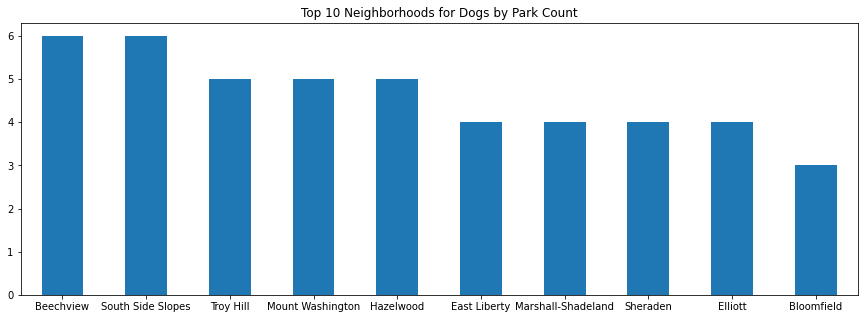

In [22]:
parks["neighborhood"].value_counts().head(10).plot(kind='bar', figsize=(15,5), rot=0, title="Top 10 Neighborhoods for Dogs by Park Count")

The bar chart shows the spread of how many parks are in each neighborhood very well. You can see that the two neighborhoods with the most parks are Beechview and South Side Slopes, both having 6 parks. Based on the metric for being the "best" neighborhood being the quantity of parks, Beechview and South Side Slopes are the two best neighborhoods.

### Creating a Map of Parks Per Neighborhood

First I needed to reformat my data into a new data frame so it could be in a proper format to be merged with the map format. The new data frame is called `data` and contains each neighborhood with the corresponding number of parks in that neighborhood.

In [43]:
num_parks = parks["neighborhood"].value_counts()
data = pd.DataFrame(num_parks)
data["values"] = data["neighborhood"]
data["neighborhood"] = data.index
data = data.reset_index(drop=True)
data

,neighborhood,values
0,Beechview,6
1,South Side Slopes,6
2,Troy Hill,5
3,Mount Washington,5
4,Hazelwood,5
...,...,...
66,Windgap,1
67,Central Lawrenceville,1
68,Oakwood,1
69,Hays,1


Next, I merged my new data frame with the `neighborhoods` information containing the shape for the map I am creating which allowed me to make the map below. From this map we can see a map of Pittsburgh neighborhoods where neighborhoods with more parks are a darker shade of red.

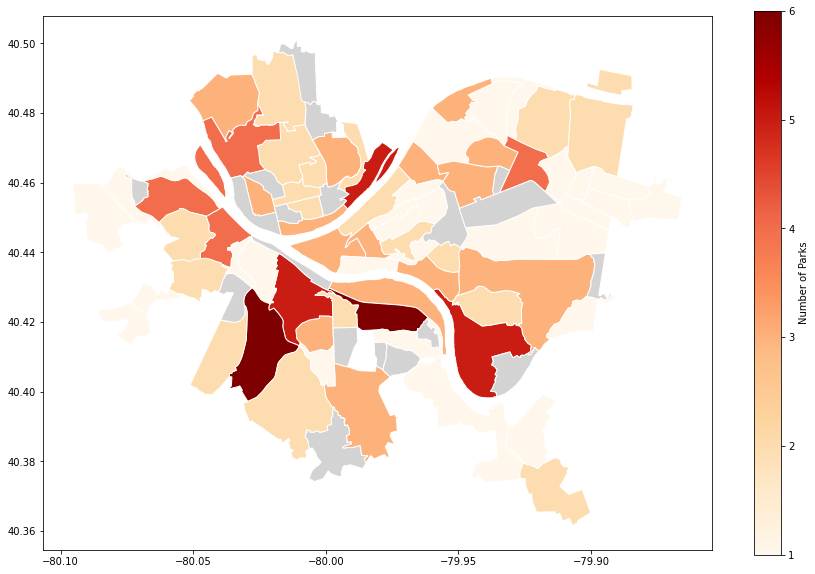

In [45]:
neighborhoods = geopandas.read_file("Neighborhood/Neighborhoods_.shp")
parks_map = neighborhoods.merge(data, how='left', left_on='hood', right_on='neighborhood')
#parks_map[['hood','values','geometry']].head(10) <-this line displays the first 10 elements of merged data set which is helpful for testing
#parks_map.plot(column='values') <- this line plots a smaller map with no key but is helpful for testing pusposes
parks_map.plot(column='values', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

The neighborhoods that are the darkest shade of red have 6 parks each, then each neighborhood in a lighter shade of red has fewer parks. The neighborhoods in gray were not listed in the park data set that I used, so we will assume that there are 0 parks in those neighborhoods.

For further analysis, I give each neighborhood a score out of 10. Since the max number of parks in ant neighborhood is 6, I will multiply each neighborhood's number of parks by 5/3 (or 10/6). This way the neighborhoods with 6 parks will recieve a 10/10 and then every other neighborhood will recive a 10 or lower score out of 10. To make the data easier to read I will also round down to the nearest integer.

In [56]:
park_scores_dict={"neighborhood": [x[0] for x in num_parks.iteritems()], "rank out of 10": [math.floor(x[1]*(5/3)) for x in num_parks.iteritems()]}
park_scores=pd.DataFrame(park_scores_dict)
park_scores.head(15)

,neighborhood,rank out of 10
0,Beechview,10
1,South Side Slopes,10
2,Troy Hill,8
3,Mount Washington,8
4,Hazelwood,8
5,East Liberty,6
6,Marshall-Shadeland,6
7,Sheraden,6
8,Elliott,6
9,Bloomfield,5


## The Best Neighborhood Is...
### Beechview or South Side Slopes!
Both of these neighborhoods have 6 parks each. From the bar chart we know that the two most optimal neighborhoods would be Beechview and South Side Slopes which we can then see in dark red on the map of Pittsbugh. Also Beechview and South Side Slopes are ranked 10/10 for parks. So the best neighborhoods for a dog based on number of parks per neighborhood are Beechview and South Side Slopes. 

![gif](https://media.giphy.com/media/3ndAvMC5LFPNMCzq7m/giphy-downsized-large.gif)